In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

pd.set_option('display.max_columns', None)

from config import *
from inventory_processing_functions import *

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

# Import tree-level data from data archive

In [2]:
# Package ID: edi.2104.1 Cataloging System:https://pasta.edirepository.org.
# Data set title: The Fire and Fire Surrogate Study: Berkeley Forests, 2001-2020.
# Data set creator:  Scott Stephens - University of California, Berkeley 
# Data set creator:  Robert York - University of California, Berkeley 
# Data set creator:  Ariel Roughton - University of California, Berkeley 
# Data set creator:  John Battles - University of California, Berkeley 
# Data set creator:  Brandon Collins - University of California, Berkeley 
# Metadata Provider:  Yihong Zhu - University of California, Berkeley 
# Metadata Provider:  Helena Kleiner - University of California, Berkeley 
# Contact:  John Battles - Professor of Forest Ecology University of California, Berkeley  - jbattles@berkeley.edu
# Stylesheet v1.3 for metadata conversion into program: John H. Porter, Univ. Virginia, jporter@virginia.edu      
# 
# This cell, excerpted from the data archive, creates a PANDA dataframe for the "trees" data table. 
# For the tree growth meta-analysis, we do not use the "fuels," "shrub," or "forb_grass" data tables.


infile1  ="https://pasta.lternet.edu/package/data/eml/edi/2104/1/2d5563ed288ac5396add9b78fbca810b".strip() 
infile1  = infile1.replace("https://","http://")

dt1 =pd.read_csv(infile1 
          ,storage_options={'User-Agent':'EDI_CodeGen'}
          ,skiprows=1
            ,sep=","  
                ,quotechar='"' 
           , names=[
                    "treatment",     
                    "comp",     
                    "plot_id",     
                    "timestep",     
                    "tree_id",     
                    "status",     
                    "species",     
                    "dbh_cm",     
                    "height_m",     
                    "htcb_m",     
                    "crown_ratio",     
                    "tph"    ]
                 ,na_values={
                  'htcb_m':[
                          'NA',],
                  'crown_ratio':[
                          'NA',],} 
            
    )

# Coerce the data into the types specified in the metadata  
dt1.treatment=dt1.treatment.astype('category')  
dt1.comp=dt1.comp.astype('category')  
dt1.plot_id=dt1.plot_id.astype('category')  
dt1.timestep=dt1.timestep.astype('category')  
dt1.tree_id=dt1.tree_id.astype('category')  
dt1.status=dt1.status.astype('category')  
dt1.species=dt1.species.astype('category') 
dt1.dbh_cm=pd.to_numeric(dt1.dbh_cm,errors='coerce') 
dt1.height_m=pd.to_numeric(dt1.height_m,errors='coerce') 
dt1.htcb_m=pd.to_numeric(dt1.htcb_m,errors='coerce') 
dt1.crown_ratio=pd.to_numeric(dt1.crown_ratio,errors='coerce') 
dt1.tph=pd.to_numeric(dt1.tph,errors='coerce') 

print("Here is a description of the data frame dt1 and number of lines\n")
print(dt1.info())
print("--------------------\n\n")                
print("Here is a summary of numerical variables in the data frame dt1\n")
print(dt1.describe())
print("--------------------\n\n")       

Here is a description of the data frame dt1 and number of lines

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20276 entries, 0 to 20275
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   treatment    20276 non-null  category
 1   comp         20276 non-null  category
 2   plot_id      20276 non-null  category
 3   timestep     20276 non-null  category
 4   tree_id      20276 non-null  category
 5   status       20276 non-null  category
 6   species      20276 non-null  category
 7   dbh_cm       20276 non-null  float64 
 8   height_m     20276 non-null  float64 
 9   htcb_m       19094 non-null  float64 
 10  crown_ratio  19094 non-null  float64 
 11  tph          20276 non-null  float64 
dtypes: category(7), float64(5)
memory usage: 1.3 MB
None
--------------------


Here is a summary of numerical variables in the data frame dt1

             dbh_cm      height_m        htcb_m   crown_ratio           tph
cou

# Preliminary data cleaning and filtering

In [3]:
# Check that category types are clean for important columns (look for null or strange values)
for cat in ['treatment','comp','plot_id','timestep','status','species']:
    print(cat)
    print(*dt1[cat].unique())
    print(dt1[cat].dtype)
print("Total number of plots")
print(len(dt1['plot_id'].unique()))
print("Total number of trees")
print(len(dt1['tree_id'].unique()))

treatment
mech burn control mechburn
category
comp
490 340 40 240 590 190 60 180 400 380 570 350
category
plot_id
0490-00104 0490-00120 0340-00006 0490-00035 0490-00018 0340-00114 0490-00105 0040-00112 0040-00108 0340-00104 0490-00115 0340-00121 0490-00122 0490-00042 0490-00117 0340-00026 0490-00110 0240-00106 0590-00101 0490-00102 0190-00025 0490-00126 0590-00117 0490-00124 0190-00027 0590-00005 0190-00113 0040-00111 0040-00109 0040-00114 0040-00105 0040-00115 0040-00104 0040-00007 0040-00110 0240-00026 0040-00103 0040-00101 0240-00104 0040-00106 0240-00114 0240-00107 0240-00102 0040-00005 0240-00101 0240-00005 0240-00112 0590-00115 0240-00105 0240-00110 0040-00113 0040-00107 0240-00003 0040-00116 0240-00022 0590-00013 0590-00106 0340-00113 0340-00108 0340-00116 0340-00111 0190-00116 0340-00112 0340-00013 0240-00007 0240-00115 0190-00104 0190-00114 0490-00008 0190-00010 0190-00102 0190-00111 0490-00004 0190-00110 0340-00117 0340-00122 0340-00123 0060-00027 0040-00012 0340-00115 0180-0

In [4]:
# Map timesteps to inventory year
invntry_yr_dict = {
    'pre_treatment': 2001,
    'post_1': 2003,
    'post_7': 2009,
    'post_14': 2016,
    'post_18': 2020}

# Add a Year column
dt1['year'] = [invntry_yr_dict[i] for i in dt1['timestep']]
dt1

,treatment,comp,plot_id,timestep,tree_id,status,species,dbh_cm,height_m,htcb_m,crown_ratio,tph,year
0,mech,490,0490-00104,post_7,0490-00104-X09,Live,CONU,1.000,2.700000,0.961158,0.644016,246.913580,2009
1,mech,490,0490-00120,post_18,0490-00120-31,Live,CONU,0.254,1.490259,0.530509,0.644016,24.691358,2020
2,burn,340,0340-00006,post_18,0340-00006-54,Live,CONU,2.794,2.692847,0.958612,0.644016,24.691358,2020
3,mech,490,0490-00120,post_18,0490-00120-33,Live,CONU,1.778,2.211812,0.787371,0.644016,24.691358,2020
4,mech,490,0490-00120,post_18,0490-00120-24,Live,CONU,0.508,1.610518,0.573319,0.644016,24.691358,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20271,mechburn,570,0570-00106,pre_treatment,0570-00106-8,Snag,OTHER,65.300,6.100000,NaN,NaN,24.691360,2001
20272,burn,400,0400-00112,post_18,0400-00112-23,Snag,OTHER,23.368,3.352800,NaN,NaN,24.691360,2020
20273,mechburn,570,0570-00106,post_1,0570-00106-8,Snag,OTHER,65.300,6.100000,NaN,NaN,24.691360,2003
20274,mechburn,380,0380-00120,pre_treatment,0380-00120-1,Snag,OTHER,33.000,19.800000,NaN,NaN,24.691360,2001


In [5]:
# Set column variables

treeid_col = 'tree_id' # Tree ID
date_col = 'year' # Inventory date
dbh_col = 'dbh_cm' # DBH
species_col = 'species' # Species
status_col = 'status' # Life status
dead_ind = 'Snag' # Status value if tree is dead
live_ind = "Live" # Status value if tree is alive
date_incr = 'year' # Inventory date increment (day or year)
unit_col = 'comp' # Treatment unit ID
plotid_col = 'plot_id' # Plot ID
year_col = 'year' # Inventory Year

In [6]:
# How many unique trees, records at this point?
print("No. unique trees:", len(dt1[treeid_col].unique()))
print("No. records:", len(dt1))

No. unique trees: 8166
No. records: 20276


## Remove trees smaller than 15cm DBH

In [7]:
# For consistency with other sites in the meta-analysis,
# remove trees with diameters smaller than 15 cm

include_small = False

if include_small == False:
  # Include only trees larger than the global minimum measurement threshold across sites
  clean = dt1.loc[dt1[dbh_col] >=glbl_dbh_min].copy()
else:
    clean = dt1.copy()
clean

,treatment,comp,plot_id,timestep,tree_id,status,species,dbh_cm,height_m,htcb_m,crown_ratio,tph,year
23,burn,340,0340-00121,pre_treatment,0340-00121-8,Live,CONU,18.500,8.3000,2.6000,0.686747,24.691358,2001
46,control,240,0240-00106,pre_treatment,0240-00106-1,Live,CONU,27.900,18.9000,9.4000,0.502646,24.691358,2001
185,mech,490,0490-00122,pre_treatment,0490-00122-24,Live,CHCH,19.100,12.9000,5.8000,0.550388,24.691358,2001
190,mech,490,0490-00124,post_14,0490-00124-8,Live,CHCH,24.384,9.4488,2.7432,0.709677,24.691358,2016
194,mech,490,0490-00122,post_1,0490-00122-25,Live,CHCH,23.400,18.0000,8.8000,0.511111,24.691358,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20271,mechburn,570,0570-00106,pre_treatment,0570-00106-8,Snag,OTHER,65.300,6.1000,NaN,NaN,24.691360,2001
20272,burn,400,0400-00112,post_18,0400-00112-23,Snag,OTHER,23.368,3.3528,NaN,NaN,24.691360,2020
20273,mechburn,570,0570-00106,post_1,0570-00106-8,Snag,OTHER,65.300,6.1000,NaN,NaN,24.691360,2003
20274,mechburn,380,0380-00120,pre_treatment,0380-00120-1,Snag,OTHER,33.000,19.8000,NaN,NaN,24.691360,2001


## Check for duplicated, null, and fill values

In [8]:
# Check for duplicated rows
dupes = clean.loc[clean.duplicated()]
assert len(dupes) == 0

# Check for trees that have more than one record for a given inventory year
nonpureDupes = clean.loc[clean[[treeid_col, 'year']].duplicated()]
assert len(nonpureDupes) == 0

# Check for null tree tags
assert len(clean[clean[treeid_col].isnull()])==0

# Examine data summary for weird values in DBH column (nulls, 999, 0...).
assert len(clean.loc[clean[dbh_col].isnull()])==0
clean.describe(include="all")

,treatment,comp,plot_id,timestep,tree_id,status,species,dbh_cm,height_m,htcb_m,crown_ratio,tph,year
count,13788,13788.0,13788,13788,13788,13788,13788,13788.000000,13788.000000,12617.000000,12617.000000,1.378800e+04,13788.000000
unique,4,12.0,219,5,3958,2,12,NaN,NaN,NaN,NaN,NaN,NaN
top,control,240.0,0240-00022,pre_treatment,0590-00118-6,Live,CADE,NaN,NaN,NaN,NaN,NaN,NaN
freq,5122,1870.0,237,3713,5,12662,4928,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.926091,20.905585,9.510972,0.547758,2.469136e+01,2008.633377
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.343178,10.811361,5.363686,0.157892,6.273922e-07,7.246390
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,1.370000,0.000000,0.020408,2.469136e+01,2001.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.900000,12.192000,5.500000,0.443983,2.469136e+01,2001.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.500000,18.288000,8.229600,0.551724,2.469136e+01,2009.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.400000,28.956000,12.700000,0.655738,2.469136e+01,2016.000000


In [9]:
# There are remeasurements on dead trees
# We'll removed these dead tree remeasurements later
print("Number of unique trees recorded as dead")
print(len(clean.loc[clean[status_col]==dead_ind, treeid_col].unique()))

print('Total number of dead tree records')
print(len(clean.loc[clean[status_col]==dead_ind]))

Number of unique trees recorded as dead
631
Total number of dead tree records
1126


## Remove pre-treatment measurements

In [10]:
# Remove pre-treatment measurements
clean_w_pre = clean.copy() # save a pre-treatment version

clean = clean.loc[clean['timestep']!='pre_treatment']

In [11]:
# Reset index
clean.reset_index(inplace=True, drop=True)

# How many unique trees, records at this point?
print("No. unique trees:", len(clean[treeid_col].unique()))
print("No. records:", len(clean))

clean

No. unique trees: 3006
No. records: 10075


,treatment,comp,plot_id,timestep,tree_id,status,species,dbh_cm,height_m,htcb_m,crown_ratio,tph,year
0,mech,490,0490-00124,post_14,0490-00124-8,Live,CHCH,24.384,9.4488,2.7432,0.709677,24.691358,2016
1,mech,490,0490-00122,post_1,0490-00122-25,Live,CHCH,23.400,18.0000,8.8000,0.511111,24.691358,2003
2,mech,490,0490-00018,post_14,0490-00018-17,Live,CHCH,17.526,7.6200,1.5240,0.800000,24.691358,2016
3,mech,490,0490-00122,post_1,0490-00122-22,Live,CHCH,38.400,21.6000,7.6000,0.648148,24.691358,2003
4,mech,490,0490-00124,post_14,0490-00124-16,Live,CHCH,44.958,17.0688,3.6576,0.785714,24.691358,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10070,mechburn,570,0570-00106,post_18,0570-00106-10,Snag,OTHER,24.384,5.1816,0.6096,0.882353,24.691360,2020
10071,mechburn,570,0570-00106,post_14,0570-00106-10,Snag,OTHER,25.654,3.9624,NaN,NaN,24.691360,2016
10072,mechburn,380,0380-00010,post_14,0380-00010-17,Snag,OTHER,27.432,2.4384,NaN,NaN,24.691358,2016
10073,burn,400,0400-00112,post_18,0400-00112-23,Snag,OTHER,23.368,3.3528,NaN,NaN,24.691360,2020


# Calculate individual tree growth over time

In [12]:
# Drop unnecessary columns
clean = clean.loc[:, ['treatment', 'comp', 'plot_id', 'year', 'timestep', 'tree_id', 'status', 'species', 'dbh_cm', 'tph']]

In [13]:
# Test tree_thru_time function
t = '0040-00116-21'
test_tree = tree_thru_time(t, clean,treeid_col, date_col, dbh_col, status_col,
                           dead_ind, date_incr)
test_tree

,treatment,comp,plot_id,year,timestep,tree_id,status,species,dbh_cm,tph,time_increment_yr,dbh_delta_cm,dbh_increment_cm/yr,start_year,end_year
1106,control,40,0040-00116,2003,post_1,0040-00116-21,Live,QUKE,32.800,24.691358,NaN,NaN,NaN,NaN,2003
470,control,40,0040-00116,2009,post_7,0040-00116-21,Live,QUKE,33.600,24.691358,6.0,0.800,0.133333,2003.0,2009
749,control,40,0040-00116,2016,post_14,0040-00116-21,Live,QUKE,35.306,24.691358,7.0,1.706,0.243714,2009.0,2016
527,control,40,0040-00116,2020,post_18,0040-00116-21,Live,QUKE,35.052,24.691358,4.0,-0.254,-0.063500,2016.0,2020


In [14]:
# As a visual check, compare the output above to raw data
dt1.loc[dt1[treeid_col]==t]

,treatment,comp,plot_id,timestep,tree_id,status,species,dbh_cm,height_m,htcb_m,crown_ratio,tph,year
1774,control,40,0040-00116,post_7,0040-00116-21,Live,QUKE,33.600,13.9000,NaN,NaN,24.691358,2009
1908,control,40,0040-00116,post_18,0040-00116-21,Live,QUKE,35.052,24.9936,15.2400,0.390244,24.691358,2020
2119,control,40,0040-00116,pre_treatment,0040-00116-21,Live,QUKE,32.000,18.3000,12.8000,0.300546,24.691358,2001
2373,control,40,0040-00116,post_14,0040-00116-21,Live,QUKE,35.306,24.9936,14.3256,0.426829,24.691358,2016
3130,control,40,0040-00116,post_1,0040-00116-21,Live,QUKE,32.800,18.3000,12.8000,0.300546,24.691358,2003


In [15]:
# Calculate growth records for all trees
# Record trees associated with mismatched species or resurrections

spp_mismatch = []
resurrected = []
ddbh_df_wDead = pd.DataFrame({})


for tree in clean[treeid_col].unique(): # Loop through all trees
  # # Report progress
  # if tree_no % 1000 ==0:
  #   print(tree_no)

  # Get the individual tree's growth timeseries
  single_tree = tree_thru_time(tree,clean,treeid_col, date_col, dbh_col,
                               status_col, dead_ind, date_incr)

  # Append tree-specific data to site-wide list
  ddbh_df_wDead = pd.concat([ddbh_df_wDead,single_tree])

  # tree_no +=1
  # Add the tree to the appropriate list if it is associated with mismatched species or resurrections
  if mismatched_species(tree_df=single_tree,species_col=species_col):
    spp_mismatch.append(tree)
  if resurrected_trees(single_tree,status_col,live_ind=live_ind,dead_ind=dead_ind):
    resurrected.append(tree)
ddbh_df_wDead

,treatment,comp,plot_id,year,timestep,tree_id,status,species,dbh_cm,tph,time_increment_yr,dbh_delta_cm,dbh_increment_cm/yr,start_year,end_year
234,mech,490,0490-00124,2003,post_1,0490-00124-8,Live,NODE,22.900,24.691358,NaN,NaN,NaN,NaN,2003
268,mech,490,0490-00124,2009,post_7,0490-00124-8,Live,NODE,33.500,24.691358,6.0,10.600,1.766667,2003.0,2009
0,mech,490,0490-00124,2016,post_14,0490-00124-8,Live,CHCH,24.384,24.691358,7.0,-9.116,-1.302286,2009.0,2016
18,mech,490,0490-00124,2020,post_18,0490-00124-8,Live,CHCH,24.892,24.691358,4.0,0.508,0.127000,2016.0,2020
1,mech,490,0490-00122,2003,post_1,0490-00122-25,Live,CHCH,23.400,24.691358,NaN,NaN,NaN,NaN,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10002,mechburn,380,0380-00102,2016,post_14,0380-00102-24,Live,CADE,31.750,24.691360,7.0,2.050,0.292857,2009.0,2016
10010,mechburn,380,0380-00104,2003,post_1,0380-00104-51,Live,CADE,24.100,24.691360,NaN,NaN,NaN,NaN,2003
10058,mechburn,570,0570-00106,2003,post_1,0570-00106-3,Snag,CADE,21.800,24.691360,NaN,NaN,NaN,NaN,2003
10067,mechburn,380,0380-00127,2020,post_18,0380-00127-24,Snag,OTHER,22.606,24.691360,NaN,NaN,NaN,NaN,2020


## Resolve species mismatches

In [16]:
# Were there any trees with inconsistent species records?
print("Number of trees with mismatched species records:")
print(len(spp_mismatch))
print("Tree IDs with mismatched species")
print(spp_mismatch)

Number of trees with mismatched species records:
62
Tree IDs with mismatched species
['0490-00124-8', '0490-00122-25', '0490-00018-17', '0490-00122-22', '0490-00124-16', '0490-00122-19', '0490-00122-26', '0490-00124-17', '0490-00122-20', '0490-00122-21', '0190-00113-14', '0190-00113-11', '0490-00124-7', '0190-00113-13', '0190-00113-12', '0040-00110-21', '0380-00125-14', '0040-00108-2', '0240-00113-6', '0240-00113-5', '0040-00101-1', '0340-00013-3', '0040-00104-8', '0340-00114-13', '0340-00104-20', '0400-00118-12', '0040-00002-3', '0590-00104-13', '0040-00002-16', '0040-00003-25', '0040-00105-18', '0040-00003-17', '0060-00119-6', '0590-00009-20', '0040-00003-1', '0570-00115-17', '0340-00025-15', '0350-00117-10', '0400-00102-24', '0340-00026-21', '0180-00110-4', '0400-00023-3', '0400-00024-7', '0490-00126-7', '0190-00113-1', '0190-00116-2', '0240-00112-7', '0490-00041-9', '0400-00002-6', '0190-00010-25', '0350-00115-9', '0190-00113-28', '0180-00101-40', '0380-00102-9', '0400-00112-21', '

In [17]:
# For trees with mismatched species, I take the latest inventory's species to be the correct one.

# Make a new species column, renaming the original that contains raw data
ddbh_df_wDead.rename(columns={species_col: "Species_raw"}, inplace=True)
ddbh_df_wDead[species_col] = ddbh_df_wDead['Species_raw']

# The most recent species record is taken to be the correct one
for t in spp_mismatch:
  t_ts = ddbh_df_wDead.loc[ddbh_df_wDead[treeid_col]==t]
  ddbh_df_wDead.loc[ddbh_df_wDead[treeid_col] == t, species_col] = t_ts.iloc[-1,:][species_col]

# Spot check
ddbh_df_wDead.loc[ddbh_df_wDead[treeid_col].isin(spp_mismatch)].tail(10)

,treatment,comp,plot_id,year,timestep,tree_id,status,Species_raw,dbh_cm,tph,time_increment_yr,dbh_delta_cm,dbh_increment_cm/yr,start_year,end_year,species
10072,mechburn,380,0380-00010,2016,post_14,0380-00010-17,Snag,OTHER,27.432,24.691358,7.0,NaN,NaN,2009.0,2016,OTHER
10065,mechburn,380,0380-00010,2020,post_18,0380-00010-17,Snag,OTHER,27.686,24.691360,4.0,NaN,NaN,2016.0,2020,OTHER
10064,mechburn,570,0570-00106,2003,post_1,0570-00106-10,Snag,OTHER,24.100,24.691360,NaN,NaN,NaN,NaN,2003,OTHER
9836,mechburn,570,0570-00106,2009,post_7,0570-00106-10,Snag,CADE,25.000,24.691360,6.0,NaN,NaN,2003.0,2009,OTHER
10071,mechburn,570,0570-00106,2016,post_14,0570-00106-10,Snag,OTHER,25.654,24.691360,7.0,NaN,NaN,2009.0,2016,OTHER
10070,mechburn,570,0570-00106,2020,post_18,0570-00106-10,Snag,OTHER,24.384,24.691360,4.0,NaN,NaN,2016.0,2020,OTHER
10074,mechburn,570,0570-00106,2003,post_1,0570-00106-8,Snag,OTHER,65.300,24.691360,NaN,NaN,NaN,NaN,2003,OTHER
9892,mechburn,570,0570-00106,2009,post_7,0570-00106-8,Snag,CADE,64.700,24.691360,6.0,NaN,NaN,2003.0,2009,OTHER
10069,mechburn,570,0570-00106,2016,post_14,0570-00106-8,Snag,OTHER,62.738,24.691360,7.0,NaN,NaN,2009.0,2016,OTHER
10066,mechburn,570,0570-00106,2020,post_18,0570-00106-8,Snag,OTHER,64.516,24.691360,4.0,NaN,NaN,2016.0,2020,OTHER


In [18]:
# Check that each unique tree is only associated with one species
tree_sp = ddbh_df_wDead.groupby([treeid_col,unit_col,species_col],as_index=False, observed = True).count()[[treeid_col,unit_col,species_col]]
assert len(tree_sp) == len(ddbh_df_wDead[treeid_col].unique())

## Resolve tree resurrections

In [19]:
# Were there any trees that were recorded as being resurrected?
print("Number of trees with resurrection records:")
print(len(resurrected))
print("Tree IDs with resurrection records")
print(resurrected)

Number of trees with resurrection records:
1
Tree IDs with resurrection records
['0400-00118-22']


In [20]:
# Examine the resurrected tree's timeseries
ddbh_df_wDead.loc[ddbh_df_wDead[treeid_col]=='0400-00118-22']

,treatment,comp,plot_id,year,timestep,tree_id,status,Species_raw,dbh_cm,tph,time_increment_yr,dbh_delta_cm,dbh_increment_cm/yr,start_year,end_year,species
9334,burn,400,0400-00118,2003,post_1,0400-00118-22,Live,CADE,24.900,24.69136,NaN,NaN,NaN,NaN,2003,CADE
9339,burn,400,0400-00118,2009,post_7,0400-00118-22,Snag,CADE,26.100,24.69136,6.0,1.2,0.2,2003.0,2009,CADE
8579,burn,400,0400-00118,2016,post_14,0400-00118-22,Snag,CADE,25.908,24.69136,7.0,NaN,NaN,2009.0,2016,CADE
8597,burn,400,0400-00118,2020,post_18,0400-00118-22,Live,CADE,25.908,24.69136,4.0,0.0,0.0,2016.0,2020,CADE


In [21]:
# I assume that the 2020 record is incorrect and that the tree is dead. 

# Make a new status column, renaming the original that contains raw data
ddbh_df_wDead.rename(columns={status_col: "Status_raw"}, inplace=True)
ddbh_df_wDead[status_col] = ddbh_df_wDead['Status_raw']

# Correct the status
ddbh_df_wDead.loc[(ddbh_df_wDead[treeid_col]=='0400-00118-22') & (ddbh_df_wDead[year_col]==2020), status_col] = dead_ind

## Drop remeasurements of dead trees

In [22]:
# Drop second (and further) records for dead trees
# I.e., retain only the first dead tree record
dead_ba_flag = []
for tree in ddbh_df_wDead[treeid_col].unique():
  one_tree = ddbh_df_wDead.loc[ddbh_df_wDead[treeid_col]==tree]
  for i in range(len(one_tree)):
    if i == 0:
      dead_ba_flag.append(0)
    elif (one_tree[status_col].iloc[i]==dead_ind) & (one_tree[status_col].iloc[i-1] == dead_ind):
      dead_ba_flag.append(1)
    else:
      dead_ba_flag.append(0)
ddbh_df_wDead['Remove flag'] = dead_ba_flag

In [23]:
## Some checks
check = ddbh_df_wDead.loc[ddbh_df_wDead['Remove flag']==1]
assert (check[status_col]==dead_ind).all() # All flagged trees are in fact dead
print(check['year'].unique()) # Can't be the first inventory year
check

[2020 2016 2009]


,treatment,comp,plot_id,year,timestep,tree_id,Status_raw,Species_raw,dbh_cm,tph,time_increment_yr,dbh_delta_cm,dbh_increment_cm/yr,start_year,end_year,species,status,Remove flag
208,control,40,0040-00115,2020,post_18,0040-00115-16,Snag,NODE,23.114,24.691358,4.0,NaN,NaN,2016.0,2020,NODE,Snag,1
50,control,40,0040-00110,2016,post_14,0040-00110-12,Snag,NODE,27.432,24.691358,7.0,NaN,NaN,2009.0,2016,NODE,Snag,1
436,burn,340,0340-00112,2009,post_7,0340-00112-2,Snag,NODE,21.700,24.691358,6.0,NaN,NaN,2003.0,2009,NODE,Snag,1
432,burn,340,0340-00112,2009,post_7,0340-00112-32,Snag,NODE,22.100,24.691358,6.0,NaN,NaN,2003.0,2009,NODE,Snag,1
337,burn,340,0340-00026,2009,post_7,0340-00026-23,Snag,NODE,99.100,24.691358,6.0,NaN,NaN,2003.0,2009,NODE,Snag,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9946,mechburn,180,0180-00117,2009,post_7,0180-00117-10,Snag,CADE,40.100,24.691360,6.0,NaN,NaN,2003.0,2009,CADE,Snag,1
10008,mechburn,180,0180-00117,2016,post_14,0180-00117-10,Snag,CADE,22.860,24.691360,7.0,NaN,NaN,2009.0,2016,CADE,Snag,1
9892,mechburn,570,0570-00106,2009,post_7,0570-00106-8,Snag,CADE,64.700,24.691360,6.0,NaN,NaN,2003.0,2009,OTHER,Snag,1
10069,mechburn,570,0570-00106,2016,post_14,0570-00106-8,Snag,OTHER,62.738,24.691360,7.0,NaN,NaN,2009.0,2016,OTHER,Snag,1


In [24]:
# Drop remeasurements of dead trees
ddbh_df=ddbh_df_wDead.drop(ddbh_df_wDead.loc[ddbh_df_wDead['Remove flag']==1].index)
ddbh_df

,treatment,comp,plot_id,year,timestep,tree_id,Status_raw,Species_raw,dbh_cm,tph,time_increment_yr,dbh_delta_cm,dbh_increment_cm/yr,start_year,end_year,species,status,Remove flag
234,mech,490,0490-00124,2003,post_1,0490-00124-8,Live,NODE,22.900,24.691358,NaN,NaN,NaN,NaN,2003,CHCH,Live,0
268,mech,490,0490-00124,2009,post_7,0490-00124-8,Live,NODE,33.500,24.691358,6.0,10.600,1.766667,2003.0,2009,CHCH,Live,0
0,mech,490,0490-00124,2016,post_14,0490-00124-8,Live,CHCH,24.384,24.691358,7.0,-9.116,-1.302286,2009.0,2016,CHCH,Live,0
18,mech,490,0490-00124,2020,post_18,0490-00124-8,Live,CHCH,24.892,24.691358,4.0,0.508,0.127000,2016.0,2020,CHCH,Live,0
1,mech,490,0490-00122,2003,post_1,0490-00122-25,Live,CHCH,23.400,24.691358,NaN,NaN,NaN,NaN,2003,CHCH,Live,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10002,mechburn,380,0380-00102,2016,post_14,0380-00102-24,Live,CADE,31.750,24.691360,7.0,2.050,0.292857,2009.0,2016,CADE,Live,0
10010,mechburn,380,0380-00104,2003,post_1,0380-00104-51,Live,CADE,24.100,24.691360,NaN,NaN,NaN,NaN,2003,CADE,Live,0
10058,mechburn,570,0570-00106,2003,post_1,0570-00106-3,Snag,CADE,21.800,24.691360,NaN,NaN,NaN,NaN,2003,CADE,Snag,0
10067,mechburn,380,0380-00127,2020,post_18,0380-00127-24,Snag,OTHER,22.606,24.691360,NaN,NaN,NaN,NaN,2020,OTHER,Snag,0


In [25]:
# Check that there are no null DBH measurements
assert len(ddbh_df.loc[ddbh_df[dbh_col].isnull()])==0

# Check that each dead tree is only associated with one death record
assert len(ddbh_df.loc[ddbh_df[status_col]==dead_ind]) == len(ddbh_df.loc[ddbh_df[status_col]==dead_ind, treeid_col].unique())

In [26]:
# How many unique trees, records at this point?
print("No. unique trees:", len(ddbh_df[treeid_col].unique()))
print("No. records:", len(ddbh_df))

No. unique trees: 3006
No. records: 9690


## Remove outliers

/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'ABCO'),
  Text(1, 0, 'ACMA'),
  Text(2, 0, 'ALRH'),
  Text(3, 0, 'ARME'),
  Text(4, 0, 'CADE'),
  Text(5, 0, 'CHCH'),
  Text(6, 0, 'CONU'),
  Text(7, 0, 'NODE'),
  Text(8, 0, 'OTHER'),
  Text(9, 0, 'PILA'),
  Text(10, 0, 'PIPO'),
  Text(11, 0, 'PSME'),
  Text(12, 0, 'QUKE')])

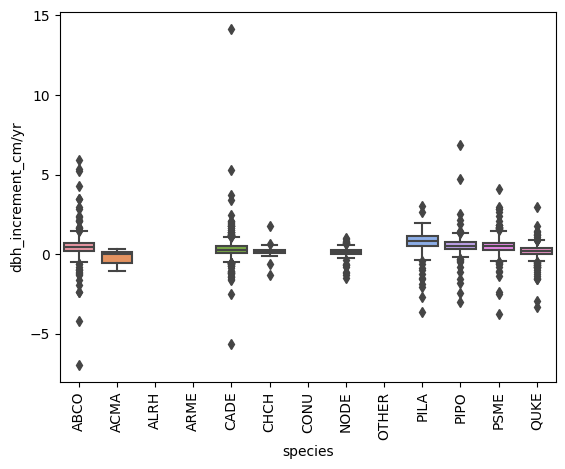

In [27]:
# Quick visualization of outliers
sns.boxplot(ddbh_df, y='dbh_increment_cm/yr', x=species_col)
plt.xticks(rotation = 90)

In [28]:
# Initial pass to identify outliers
outliers = pd.DataFrame()
sp = []
ll = []
ul = []
for s in ddbh_df[species_col].unique(): # Outliers are identified on a species basis
  sp.append(s)
  outs = id_outliers(ddbh_df, s,species_col)
  ll.append(outs[1])
  ul.append(outs[2])
  outliers = pd.concat([outliers, outs[0]])

# Create a lookup table that records the upper and lower growth limits for each species
outlier_dict = pd.DataFrame({'Species':sp,'Lower_limit':ll, 'Upper_limit':ul})
print(outlier_dict)
outliers

  Species  Lower_limit  Upper_limit
0    CHCH    -1.242201     1.647926
1    NODE    -0.766806     1.005500
2    ACMA    -2.452569     1.945855
3    QUKE    -1.255676     1.589866
4    ABCO    -1.090880     2.019100
5    PSME    -0.850632     1.874641
6    CADE    -1.132131     1.759323
7    PIPO    -1.074630     2.152652
8    PILA    -1.206470     2.706803
9   OTHER          NaN          NaN


,treatment,comp,plot_id,year,timestep,tree_id,Status_raw,Species_raw,dbh_cm,tph,time_increment_yr,dbh_delta_cm,dbh_increment_cm/yr,start_year,end_year,species,status,Remove flag
268,mech,490,0490-00124,2009,post_7,0490-00124-8,Live,NODE,33.500,24.691358,6.0,10.600,1.766667,2003.0,2009,CHCH,Live,0
0,mech,490,0490-00124,2016,post_14,0490-00124-8,Live,CHCH,24.384,24.691358,7.0,-9.116,-1.302286,2009.0,2016,CHCH,Live,0
111,control,40,0040-00110,2020,post_18,0040-00110-5,Live,NODE,34.290,24.691358,4.0,-4.572,-1.143000,2016.0,2020,NODE,Live,0
303,burn,340,0340-00116,2009,post_7,0340-00116-19,Live,NODE,16.300,24.691358,6.0,-7.800,-1.300000,2003.0,2009,NODE,Live,0
311,burn,340,0340-00113,2020,post_18,0340-00113-23,Snag,NODE,28.702,24.691358,4.0,-4.826,-1.206500,2016.0,2020,NODE,Snag,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6485,mech,490,0490-00115,2020,post_18,0490-00115-6,Live,PILA,78.740,24.691360,4.0,-8.128,-2.032000,2016.0,2020,PILA,Live,0
6325,mechburn,380,0380-00125,2020,post_18,0380-00125-1,Snag,PILA,104.394,24.691360,4.0,-5.080,-1.270000,2016.0,2020,PILA,Snag,0
6088,control,240,0240-00114,2020,post_18,0240-00114-20,Live,PILA,36.830,24.691360,4.0,-7.620,-1.905000,2016.0,2020,PILA,Live,0
6326,mechburn,180,0180-00102,2020,post_18,0180-00102-22,Snag,PILA,76.708,24.691360,4.0,-10.668,-2.667000,2016.0,2020,PILA,Snag,0


Process for removing outliers (as implemented in the `remove_outliers` function):

1. If a tree has one or more outliers in its growth timeseries, drop the first outlier in the tree’s growth timeseries.
2. Recalculate the mean annual DBH increment for the remaining records
3. Check the adjusted timeseries for outliers
4. Repeat (1-3) until all the outliers have been removed
5. Replace original growth timeseries with adjusted one
6. Log which records were dropped

Checks:
If the first growth increment is the outlier, decide whether first or second record needs to be dropped
If mean growth in first AND third interval exceed that of the mean growth between interval 1 and 3, the second record is the outlier. Otherwise, it’s the first.

In [29]:
# Flag all outliers
flagged_outliers = manage_outliers(ddbh_df, outliers, outlier_dict,species_col,
                                treeid_col, dbh_col, year_col, date_col,
                                status_col, dead_ind, date_incr)
flagged_outliers

,treatment,comp,plot_id,year,timestep,tree_id,Status_raw,Species_raw,dbh_cm,tph,time_increment_yr,dbh_delta_cm,dbh_increment_cm/yr,start_year,end_year,species,status,Remove flag,Outlier
234,mech,490,0490-00124,2003,post_1,0490-00124-8,Live,NODE,22.900,24.691358,NaN,NaN,NaN,NaN,2003,CHCH,Live,0,0
268,mech,490,0490-00124,2009,post_7,0490-00124-8,Live,NODE,33.500,24.691358,6.0,10.600,1.766667,2003.0,2009,CHCH,Live,0,1
0,mech,490,0490-00124,2016,post_14,0490-00124-8,Live,CHCH,24.384,24.691358,13.0,1.484,0.114154,2003.0,2016,CHCH,Live,0,0
18,mech,490,0490-00124,2020,post_18,0490-00124-8,Live,CHCH,24.892,24.691358,4.0,0.508,0.127000,2016.0,2020,CHCH,Live,0,0
1,mech,490,0490-00122,2003,post_1,0490-00122-25,Live,CHCH,23.400,24.691358,NaN,NaN,NaN,NaN,2003,CHCH,Live,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10002,mechburn,380,0380-00102,2016,post_14,0380-00102-24,Live,CADE,31.750,24.691360,7.0,2.050,0.292857,2009.0,2016,CADE,Live,0,0
10010,mechburn,380,0380-00104,2003,post_1,0380-00104-51,Live,CADE,24.100,24.691360,NaN,NaN,NaN,NaN,2003,CADE,Live,0,0
10058,mechburn,570,0570-00106,2003,post_1,0570-00106-3,Snag,CADE,21.800,24.691360,NaN,NaN,NaN,NaN,2003,CADE,Snag,0,0
10067,mechburn,380,0380-00127,2020,post_18,0380-00127-24,Snag,OTHER,22.606,24.691360,NaN,NaN,NaN,NaN,2020,OTHER,Snag,0,0


In [30]:
# Checks
# Did we retain all trees?
assert len(ddbh_df[treeid_col].unique()) == len(flagged_outliers[treeid_col].unique())

# Did we retain all records?
assert len(ddbh_df) == len(flagged_outliers)

# some extra code to sample individual trees to check
samps=random.sample(range(len(outliers[treeid_col].unique())),10)
trees_to_check = outliers[treeid_col].unique()[samps]
trees_to_check

['0340-00113-23', '0040-00110-5', '0190-00104-2', '0340-00113-9', '0190-00114-16', '0240-00109-30', '0350-00103-27', '0590-00109-2', '0190-00102-2', '0380-00127-7']
Categories (8166, object): ['0040-00002-1', '0040-00002-12', '0040-00002-14', '0040-00002-16', ..., '0590-00118-92', '0590-00118-93', '0590-00118-94', '0590-00118-x09']

In [31]:
# Remove the outlier records
all_inliers = flagged_outliers.loc[flagged_outliers['Outlier']==0]

#Identify trees that now only have a single record (can't calculate growth)
singles = single_records(all_inliers, treeid_col)

# Remove trees for which we do not have any repeat measurements (don't do this step for BA calculation)
ddbh_noOutliers = all_inliers.drop(all_inliers.loc[all_inliers[treeid_col].isin(singles)].index)

ddbh_noOutliers

,treatment,comp,plot_id,year,timestep,tree_id,Status_raw,Species_raw,dbh_cm,tph,time_increment_yr,dbh_delta_cm,dbh_increment_cm/yr,start_year,end_year,species,status,Remove flag,Outlier
234,mech,490,0490-00124,2003,post_1,0490-00124-8,Live,NODE,22.900,24.691358,NaN,NaN,NaN,NaN,2003,CHCH,Live,0,0
0,mech,490,0490-00124,2016,post_14,0490-00124-8,Live,CHCH,24.384,24.691358,13.0,1.484,0.114154,2003.0,2016,CHCH,Live,0,0
18,mech,490,0490-00124,2020,post_18,0490-00124-8,Live,CHCH,24.892,24.691358,4.0,0.508,0.127000,2016.0,2020,CHCH,Live,0,0
1,mech,490,0490-00122,2003,post_1,0490-00122-25,Live,CHCH,23.400,24.691358,NaN,NaN,NaN,NaN,2003,CHCH,Live,0,0
256,mech,490,0490-00122,2009,post_7,0490-00122-25,Live,NODE,25.000,24.691358,6.0,1.600,0.266667,2003.0,2009,CHCH,Live,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10029,mechburn,380,0380-00102,2009,post_7,0380-00102-4,Live,CADE,23.200,24.691360,6.0,1.400,0.233333,2003.0,2009,CADE,Live,0,0
9968,mechburn,380,0380-00102,2016,post_14,0380-00102-4,Live,CADE,24.638,24.691360,7.0,1.438,0.205429,2009.0,2016,CADE,Live,0,0
10054,mechburn,380,0380-00102,2003,post_1,0380-00102-24,Live,CADE,28.200,24.691360,NaN,NaN,NaN,NaN,2003,CADE,Live,0,0
10003,mechburn,380,0380-00102,2009,post_7,0380-00102-24,Live,CADE,29.700,24.691360,6.0,1.500,0.250000,2003.0,2009,CADE,Live,0,0


In [32]:
# Log which records were dropped
dropped_indices = [i for i in ddbh_df.index if i not in ddbh_noOutliers.index]
dropped_records = flagged_outliers.loc[dropped_indices]

# Making a table summarizing outliers
by_record = ddbh_df[[treeid_col,species_col]].groupby(species_col, as_index=False, observed = True).count()
by_tree = ddbh_df.groupby([treeid_col,species_col], as_index=False, observed = True).count()
by_tree = by_tree[[treeid_col,species_col]].groupby(species_col, as_index= False, observed = True).count()
by_record_out = ddbh_noOutliers[[treeid_col,species_col]].groupby(species_col, as_index=False, observed = True).count()
by_tree_out = ddbh_noOutliers.groupby([treeid_col,species_col], as_index=False, observed = True).count()
by_tree_out = by_tree_out[[treeid_col,species_col]].groupby(species_col, as_index= False, observed = True).count()
by_record_out

outlier_summary = outlier_dict.rename(columns={'Species':species_col})
for i, j in zip([by_record, by_record_out, by_tree, by_tree_out], ['Initial no. records','Final no. records', 'Initial no. trees','Final no. trees']):
  outlier_summary = outlier_summary.merge(i, on=species_col)
  outlier_summary.rename(columns={treeid_col:j}, inplace = True)
outlier_summary['No. records removed'] = outlier_summary['Initial no. records'] - outlier_summary['Final no. records']
outlier_summary['No. trees removed'] = outlier_summary['Initial no. trees'] - outlier_summary['Final no. trees']
outlier_summary = outlier_summary.sort_values('No. trees removed',ascending=False)
outlier_summary.loc['Total'] = outlier_summary.sum()
outlier_summary.loc['Total',[species_col,'Lower_limit','Upper_limit']] = np.nan
# outlier_summary.to_csv('outlier_summary.csv',index = False)
outlier_summary

,species,Lower_limit,Upper_limit,Initial no. records,Final no. records,Initial no. trees,Final no. trees,No. records removed,No. trees removed
4,ABCO,-1.090880,2.019100,2463,2283,812,651,180,161
6,CADE,-1.132131,1.759323,3432,3281,1035,905,151,130
3,QUKE,-1.255676,1.589866,631,573,214,164,58,50
5,PSME,-0.850632,1.874641,1529,1473,449,403,56,46
1,NODE,-0.766806,1.005500,399,361,146,113,38,33
7,PIPO,-1.074630,2.152652,720,697,198,182,23,16
8,PILA,-1.206470,2.706803,469,449,136,124,20,12
0,CHCH,-1.242201,1.647926,38,37,10,10,1,0
2,ACMA,-2.452569,1.945855,4,4,1,1,0,0
Total,NaN,NaN,NaN,9685,9158,3001,2553,527,448


## Outlier removal checking

In [33]:
# Use this and the following cell to check random trees
i = 9

# Tree prior to outlier removal
test = ddbh_df.loc[ddbh_df[treeid_col]==trees_to_check[i]]
test

,treatment,comp,plot_id,year,timestep,tree_id,Status_raw,Species_raw,dbh_cm,tph,time_increment_yr,dbh_delta_cm,dbh_increment_cm/yr,start_year,end_year,species,status,Remove flag
2297,mechburn,380,0380-00127,2003,post_1,0380-00127-7,Live,ABCO,46.20,24.69136,NaN,NaN,NaN,NaN,2003,ABCO,Live,0
2287,mechburn,380,0380-00127,2009,post_7,0380-00127-7,Live,ABCO,47.70,24.69136,6.0,1.50,0.250000,2003.0,2009,ABCO,Live,0
1718,mechburn,380,0380-00127,2016,post_14,0380-00127-7,Live,ABCO,77.47,24.69136,7.0,29.77,4.252857,2009.0,2016,ABCO,Live,0


In [34]:
# Same tree after outlier removal
ddbh_noOutliers.loc[ddbh_noOutliers[treeid_col]==trees_to_check[i]]

,treatment,comp,plot_id,year,timestep,tree_id,Status_raw,Species_raw,dbh_cm,tph,time_increment_yr,dbh_delta_cm,dbh_increment_cm/yr,start_year,end_year,species,status,Remove flag,Outlier
2297,mechburn,380,0380-00127,2003,post_1,0380-00127-7,Live,ABCO,46.2,24.69136,NaN,NaN,NaN,NaN,2003,ABCO,Live,0,0
2287,mechburn,380,0380-00127,2009,post_7,0380-00127-7,Live,ABCO,47.7,24.69136,6.0,1.5,0.25,2003.0,2009,ABCO,Live,0,0


In [35]:
# Reset index
ddbh_noOutliers.reset_index(inplace = True)

# How many unique trees, records at this point?
print("No. unique trees:", len(ddbh_noOutliers[treeid_col].unique()))
print("No. records:", len(ddbh_noOutliers))

No. unique trees: 2553
No. records: 9158


# Prep dataframes for state-space model

Final step is to take the clean and processed data and reformat it for use a statespace model defined in the R nimble package. The state-space model requires several tables.

In [36]:
# Add PFT designation to each tree
ddbh_noOutliers['PFT'] = [pft_dict[i] for i in ddbh_noOutliers[species_col]]
ddbh_noOutliers

,index,treatment,comp,plot_id,year,timestep,tree_id,Status_raw,Species_raw,dbh_cm,tph,time_increment_yr,dbh_delta_cm,dbh_increment_cm/yr,start_year,end_year,species,status,Remove flag,Outlier,PFT
0,234,mech,490,0490-00124,2003,post_1,0490-00124-8,Live,NODE,22.900,24.691358,NaN,NaN,NaN,NaN,2003,CHCH,Live,0,0,other_hardwood
1,0,mech,490,0490-00124,2016,post_14,0490-00124-8,Live,CHCH,24.384,24.691358,13.0,1.484,0.114154,2003.0,2016,CHCH,Live,0,0,other_hardwood
2,18,mech,490,0490-00124,2020,post_18,0490-00124-8,Live,CHCH,24.892,24.691358,4.0,0.508,0.127000,2016.0,2020,CHCH,Live,0,0,other_hardwood
3,1,mech,490,0490-00122,2003,post_1,0490-00122-25,Live,CHCH,23.400,24.691358,NaN,NaN,NaN,NaN,2003,CHCH,Live,0,0,other_hardwood
4,256,mech,490,0490-00122,2009,post_7,0490-00122-25,Live,NODE,25.000,24.691358,6.0,1.600,0.266667,2003.0,2009,CHCH,Live,0,0,other_hardwood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,10029,mechburn,380,0380-00102,2009,post_7,0380-00102-4,Live,CADE,23.200,24.691360,6.0,1.400,0.233333,2003.0,2009,CADE,Live,0,0,cedar
9154,9968,mechburn,380,0380-00102,2016,post_14,0380-00102-4,Live,CADE,24.638,24.691360,7.0,1.438,0.205429,2009.0,2016,CADE,Live,0,0,cedar
9155,10054,mechburn,380,0380-00102,2003,post_1,0380-00102-24,Live,CADE,28.200,24.691360,NaN,NaN,NaN,NaN,2003,CADE,Live,0,0,cedar
9156,10003,mechburn,380,0380-00102,2009,post_7,0380-00102-24,Live,CADE,29.700,24.691360,6.0,1.500,0.250000,2003.0,2009,CADE,Live,0,0,cedar


In [37]:
# Make the tree attributes table and a master dataframe

tree_attrs, pft_df = make_statespace_df(ddbh_noOutliers, year_col=year_col,
                                           unit_col = unit_col, treeid_col=treeid_col,
                                           species_col = species_col,
                                           status_col = status_col, dbh_col = dbh_col,
                                           )
tree_attrs

,TreeID,start_year,end_year,PlotID,n_obs,PFT
0,0040-00002-1,1,18,40,4,fir
1,0040-00002-12,1,18,40,4,cedar
2,0040-00002-14,1,18,40,4,other_conifer
3,0040-00002-16,1,18,40,4,other_conifer
4,0040-00002-18,1,18,40,4,cedar
...,...,...,...,...,...,...
2548,0590-00118-5,1,14,590,3,cedar
2549,0590-00118-6,1,18,590,4,other_conifer
2550,0590-00118-7,1,18,590,4,cedar
2551,0590-00118-8,1,18,590,4,fir


In [38]:
# Make tree id the index
tree_attrs = tree_attrs.sort_values('TreeID')
tree_attrs.set_index('TreeID', inplace=True)
tree_attrs

,start_year,end_year,PlotID,n_obs,PFT
TreeID,,,,,
0040-00002-1,1,18,40,4,fir
0040-00002-12,1,18,40,4,cedar
0040-00002-14,1,18,40,4,other_conifer
0040-00002-16,1,18,40,4,other_conifer
0040-00002-18,1,18,40,4,cedar
...,...,...,...,...,...
0590-00118-5,1,14,590,3,cedar
0590-00118-6,1,18,590,4,other_conifer
0590-00118-7,1,18,590,4,cedar


In [39]:
# Show the master dataframe
pft_df

,index,treatment,UnitID,plot_id,Year,timestep,TreeID,Status_raw,Species_raw,DBH,tph,time_increment_yr,dbh_delta_cm,dbh_increment_cm/yr,start_year,end_year,Species,Status,Remove flag,Outlier,PFT,timeseries_year,counter
0,234,mech,490,0490-00124,2003,post_1,0490-00124-8,Live,NODE,22.900,24.691358,NaN,NaN,NaN,NaN,2003,CHCH,Live,0,0,other_hardwood,1,1.0
1,0,mech,490,0490-00124,2016,post_14,0490-00124-8,Live,CHCH,24.384,24.691358,13.0,1.484,0.114154,2003.0,2016,CHCH,Live,0,0,other_hardwood,14,2.0
2,18,mech,490,0490-00124,2020,post_18,0490-00124-8,Live,CHCH,24.892,24.691358,4.0,0.508,0.127000,2016.0,2020,CHCH,Live,0,0,other_hardwood,18,3.0
3,1,mech,490,0490-00122,2003,post_1,0490-00122-25,Live,CHCH,23.400,24.691358,NaN,NaN,NaN,NaN,2003,CHCH,Live,0,0,other_hardwood,1,1.0
4,256,mech,490,0490-00122,2009,post_7,0490-00122-25,Live,NODE,25.000,24.691358,6.0,1.600,0.266667,2003.0,2009,CHCH,Live,0,0,other_hardwood,7,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,10029,mechburn,380,0380-00102,2009,post_7,0380-00102-4,Live,CADE,23.200,24.691360,6.0,1.400,0.233333,2003.0,2009,CADE,Live,0,0,cedar,7,2.0
9154,9968,mechburn,380,0380-00102,2016,post_14,0380-00102-4,Live,CADE,24.638,24.691360,7.0,1.438,0.205429,2009.0,2016,CADE,Live,0,0,cedar,14,3.0
9155,10054,mechburn,380,0380-00102,2003,post_1,0380-00102-24,Live,CADE,28.200,24.691360,NaN,NaN,NaN,NaN,2003,CADE,Live,0,0,cedar,1,1.0
9156,10003,mechburn,380,0380-00102,2009,post_7,0380-00102-24,Live,CADE,29.700,24.691360,6.0,1.500,0.250000,2003.0,2009,CADE,Live,0,0,cedar,7,2.0


In [40]:
# Get the first and last year of measurements 
first_yr = pft_df['Year'].min()
last_yr = pft_df['Year'].max()

# mimic Eitzel et al. 2013 data setup
n_plots = len(pft_df['UnitID'].unique())
n_trees = len(pft_df['TreeID'].unique())
n_years = last_yr - first_yr # add one to get the final year number (non-pythonic indexing)

print('First and last year of measurements:')
print(first_yr, last_yr)

print("Number of plots:")
print(n_plots)

print("Number of trees:")
print(n_trees)

print("Number of years in experiment")
print(n_years)

First and last year of measurements:
2003 2020
Number of plots:
12
Number of trees:
2553
Number of years in experiment
17


In [41]:
# Make year_tree_obs and dbh_tree_obs tables
year_tree_obs = pd.pivot_table(values='timeseries_year',
                               index='TreeID',
                               columns='counter',
                               aggfunc='median', 
                               data=pft_df,
                              observed = True)
dbh_tree_obs = pd.pivot_table(values="DBH", 
                              index="TreeID", 
                              columns='counter', 
                              aggfunc='median', 
                              data=pft_df,
                             observed = True)

# Check that indexing by treeID is consistent across all dataframes so far
assert all(tree_attrs.index == year_tree_obs.index)==True
assert all(tree_attrs.index == dbh_tree_obs.index)==True

In [42]:
year_tree_obs

counter,1.0,2.0,3.0,4.0
TreeID,,,,
0040-00002-1,1.0,7.0,14.0,18.0
0040-00002-12,1.0,7.0,14.0,18.0
0040-00002-14,1.0,7.0,14.0,18.0
0040-00002-16,1.0,7.0,14.0,18.0
0040-00002-18,1.0,7.0,14.0,18.0
...,...,...,...,...
0590-00118-5,1.0,7.0,14.0,NaN
0590-00118-6,1.0,7.0,14.0,18.0
0590-00118-7,1.0,7.0,14.0,18.0


In [43]:
dbh_tree_obs

counter,1.0,2.0,3.0,4.0
TreeID,,,,
0040-00002-1,51.6,47.8,51.562,53.594
0040-00002-12,63.0,66.2,67.818,68.580
0040-00002-14,65.5,68.4,73.152,75.184
0040-00002-16,23.9,24.2,24.892,23.622
0040-00002-18,59.4,62.8,65.024,67.056
...,...,...,...,...
0590-00118-5,20.6,20.0,20.574,NaN
0590-00118-6,69.9,72.4,75.438,80.264
0590-00118-7,23.1,26.3,29.718,29.718


In [44]:
# Add consistent treatment names
pft_df['Treatment'] = [treat_dict[i] for i in pft_df['treatment']]

# Create a unit attribute dataframe
unit_attrs = pft_df.groupby(['UnitID', "Treatment"], observed = True, as_index=False).agg("count")[['UnitID', "Treatment"]]

# Treatment years from Bernal et al. 2025
unit_attrs.loc[unit_attrs['Treatment']=='Burn','trt_yr_1']=2017
unit_attrs.loc[unit_attrs['Treatment']=='Burn','trt_yr_2']=2009
unit_attrs.loc[unit_attrs['Treatment']=='Burn','trt_yr_3']=2002

unit_attrs.loc[unit_attrs['Treatment']=='Thin','trt_yr_1']=2019
unit_attrs.loc[unit_attrs['Treatment']=='Thin','trt_yr_2']=2017
unit_attrs.loc[unit_attrs['Treatment']=='Thin','trt_yr_3']=2001

unit_attrs.loc[unit_attrs['Treatment']=='Burn+Thin','trt_yr_1']=2018
unit_attrs.loc[unit_attrs['Treatment']=='Burn+Thin','trt_yr_2']=2002

# Rename columns
unit_attrs.rename(columns = {'UnitID':'PlotID', 'Treatment':'treatment'}, inplace = True)

# Make sure index order is consistent across df's
unit_attrs = unit_attrs.sort_values('PlotID')
unit_attrs.set_index('PlotID', inplace=True)

unit_attrs

,treatment,trt_yr_1,trt_yr_2,trt_yr_3
PlotID,,,,
40,None,NaN,NaN,NaN
60,Burn,2017.0,2009.0,2002.0
180,Burn+Thin,2018.0,2002.0,NaN
190,Thin,2019.0,2017.0,2001.0
240,None,NaN,NaN,NaN
340,Burn,2017.0,2009.0,2002.0
350,Thin,2019.0,2017.0,2001.0
380,Burn+Thin,2018.0,2002.0,NaN
400,Burn,2017.0,2009.0,2002.0


In [46]:
# Save state-space input tables to disk
folder = 'Blodgett'

tree_attrs.to_csv('../../State_space_growth_models/Input_data/{}/tree_attrs.csv'.format(folder))
unit_attrs.to_csv('../../State_space_growth_models/Input_data/{}/unit_attrs.csv'.format(folder))
year_tree_obs.to_csv('../../State_space_growth_models/Input_data/{}/year_tree_obs.csv'.format(folder))
dbh_tree_obs.to_csv('../../State_space_growth_models/Input_data/{}/dbh_tree_obs.csv'.format(folder))
pft_df.to_csv('../../State_space_growth_models/Input_data/{}/pft_df.csv'.format(folder))